<u>**Making a coverage path based on a polygon considering an obstacle**</u>

**1. Create lat, lon positions of outer perimeter** <br>

1. Start tractor; Initiate GUI.  Press 'Start'; Wait for the green icon indicating RTK fix, then record all data.
2. Drive the location/site and save the data in rosbag including driving around obstacles. My suggestion is to drive the path twice.
3. In /home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/ create a folder (e.g. 'site1_20240513') to hold the working files
4. Copy the rosbag file into that folder.  Note that my github account has a storage limit, where this file will be uploaded to, of 2GB.
5. Follow, improve and merge instructions from 'Path Planning - Notes on Steps.odt' into this notebook<br>
   Determine the center point of the obstacle and the radius of the obstacle<br>
   Attribute the data into series of sites to cut and obstacles to avoid
   <br><br><br>
   Update the instructions in 'Path Planning - Notes on Steps.odt' because it is easier.  Later they can be pasted into this notebook.<br>
   Run python scripts from this notebook, but leave the code outside this notebook because it is easier to edit the code.  The exception may be in the case of plotting results.  That might have to be done inside this notebook.

**2. Extract raw data from rosbag**<br>
<br>  • Open the program ~/project_notes/code_for_testing/archive/rosbag_utilities/rosbag_latlon_to_csv.py 
<br>  • This script reads from the /fix topic in the rosbag and extracts the lat/lon data and creates a .csv file.  It also pulls the data from /odom topic to get x and y pose data.
<br>  • Open the script and adjust the output and input file names for your recent data.
<br>        ◦ Line 31 – bagfile_path
<br>        ◦ Line 32 – rosbag_filename
<br>        ◦ Line 33 -  csv_filename
<br>        ◦ Line 34 – gap_between_pts (optional – I have it set at 1 meter)
<br>    • Run the script and open “ csv_filename” output

**3. Manually select outer path**<br>
Use Plotjuggler to display the path from the rosbag while having the .csv file open.  To start: $ rosrun plotjuggler plotjuggler
<br>            ▪ Load data from file (i.e. the rosbag file); Select at least the odom statement that contains the x and y pose data; I also included the /fix in order to cross reference the lat, lon data.
<br>            ▪ If you previously saved a template with the pose data displayed you can open the .xml file (look in ~/project_notes)
<br>            ▪ In PlotJuggler on the left side, open the /odom/pose/pose/pose to get to the x and y data; Highlight x and y; Use the right mouse button to move the data onto the tab; Select OK
Add columns to the .csv file to attribute the points you want to make up the outer path.<br>
Attribute each point with identifiers to show which segment the point was associated with and the sequence the point should be run in for the counter-clockwise path. I used Plotjuggler to review the quality of the points and get time stamps to determine which points to keep and to discard.<br><br>
<img src="images/plotjuggler1.png" alt="Plotjuggler screen" width="600px">
<br>
<br>    • In the example above I have the rosbag file loaded in Plotjuggler.  I can see the x and y coordinates in the left side and I can see where the tractor is based on the dot.  I can look at the .csv file and find the time_delta data in column A and compare that to the time stamp in PlotJuggler.
<br>    • In the .csv file add two (2) columns, Reference and Original Sequence.  Original Sequence should be a value from 1-n that represents the original path ran in case you need to rebuild the spreadsheet and to help sort the points to be replayed in the sequence they were run.
<br>    • Press play in PlotJuggler and decide which time stamps represent the path you want to follow.
<br>    • In the Reference column I label each row with ‘disregard’, ‘obstacle’, ‘tree’ or one of the four sections that I want to follow.  I labeled them LR corner for lower right, LL corner for lower left and so on.
<br>    • Save the .csv file as a spreadsheet (i.e. .ods file)
<br>    • Add a column for “Path 1” and place a ‘y’ or ‘n’ on whether those points should be repeated.
<br>    • I sorted based on Path 1 (i.e. y or n) to get the points I know I want to repeat.
<br>    • Now decide where to start and how to get the points in the correct sequence.
<br>&nbsp;&nbsp;&nbsp;&nbsp;◦ I want to start in the Upper Right corner at ~-5, 12
<br>&nbsp;&nbsp;&nbsp;&nbsp;◦ A point leading into that point would be -2.5, 14.6 if you need earlier point
<br>&nbsp;&nbsp;&nbsp;&nbsp;◦ The output chute of the mower is on the right side so my path would be the starting point to the lower right, then lower left, then upper left and finish the upper right.
<br>&nbsp;&nbsp;&nbsp;&nbsp;◦ Part of the upper right is the start and part of the upper right is the end.
<br>&nbsp;&nbsp;&nbsp;&nbsp;◦ Sort by ‘UR corner’ and Sequence.  Try to determine which is the beginning and which is the end.
<br>&nbsp;&nbsp;&nbsp;&nbsp;◦ Play Plotjuggler and see which are clearly at the end and which a clearly at the beginning.  Mark those points in a separate column.  I used ‘beginning’, ‘end’, ‘first point’ and ‘last point’.
<br>&nbsp;&nbsp;&nbsp;&nbsp;◦ Choose which point is the very last and the very first.
<br>&nbsp;&nbsp;&nbsp;&nbsp;◦ I then added another column for Path Sequence.  I labeled first point as ‘1’ and worked around the other corners numbering the points to repeat in sequence until you have a complete sequence.
<br>&nbsp;&nbsp;&nbsp;&nbsp;◦ If not already, save the spreadsheet as an .xlsx file<br>
<img src="images/csv_file1.png" alt="Plotjuggler screen" width="600px">
<br>

**4. Determine Obstacle Center Points and Diameter**<br>
<br>    • Open ~code_for_testing/archive/path_polygon_rings/path_calc_circle_radius_and_center6.py
<br>    • Update / Confirm the values for:
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 157 - folder_path 
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 158 - .xlsx_filename
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 159 - tag_reference (this ID’s which obstacle to calculate – an enhancement would be to scan the site survey for all obstacles and put them in a list)
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 160 – result_sheet_name (not expected to change)
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 161 – data_sheet_name (not expected to change)
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 162 - inflation = 0.3   (this is a safety measure, not expected to change)
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 183 - num_points = 20 (not expected to change)
<br>    • Run the program and review results in sheets (e.g. ‘Obstcl_list’ and ‘Obstacle 1’).  The output of the script above will be similar to below:
<br><br>
<img src="images/circle_1.png" alt="Plotjuggler screen" width="600px">
<br>
<br>    • The red dots represent points from the original path driven; The blue circle represents the best fit and the green line segments are used later to find intersection points with the path to be driven.  The green line segments have an ‘inflation’ factor added for safety that is adjustable.
<br>
<br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal to determine obstacle center
</span>
<br>
python3 /home/tractor/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/path_polygon_rings/path_calc_circle_radius_and_center6.py


**5. Create Outer Ring Path**
<br>    • After the site survey .ods spreadsheet  has been updated by attributing each row with data about which corner the row is associated with), and any obstacle paths have been calculated open ~/code_for_testing/archive/path_polygon_rings/path_create_rings6.py
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 70 - folder_path
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 71 – file_path
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 83 – Change ‘999’ if there are more than 1000 steps in the path mission
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 84 – num_inner_rings – this plus the path size determines how big the head-space is.
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 85 - path_size = 1.0 – 42” cutting deck is actually 1.06 meters
<br>    • Run the program and review results in sheet ‘RawInnerRings’.
<br>
<img src="images/outer_paths_1.png" alt="Outer path fig 1" width="600px">
<br>
<img src="images/outer_paths_2.png" alt="Outer path fig 2" width="600px">
<br>
<br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal to calculate the outer rings
</span>
<br>
python3 /home/tractor/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/path_polygon_rings/path_create_rings6.py


**6. Determine the intersection points with obstacles and plan around them**
<br>    • Run ~code_for_testing/archive/path_polygon_rings/find_circle_intersections7.py
<br>    • This program reads the x. y and radius of the obstacle/circle and calculates the intersection points. 
<br>    • It also calculates the shortest path around the obstacle.
<br>    • This code will combine the parts of the original path with the parts that go around the obstacle into an updated sheet representing the revised path to follow.
<br>
<img src="images/intersections_1.png" alt="Intersections fig 1.png" width="600px">
<br>
<br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal to determine the intersection points
</span>
<br>
python3 /home/tractor/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/path_polygon_rings/find_circle_intersections7.py


**7. Build the concentric polygon path**
<br>    • Copy the statement below to run 'build_concentric_polygon_path.py'
<br>    • This code will combine the parts of the original path with the parts that go around the obstacle into an updated sheet representing the revised path to follow.
<br>    • The inner most ring, which is 'Path_Index=0' in the sheet, will be used to create a stripe path.
<br>    • Below is sample output.
<br>
<img src="images/outer_rings1.png" alt="Outer Rings fig 1.png" width="600px">
<br>
<br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal to build concentric polygon path
</span>
<br>
python3 /home/tractor/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/path_polygon_rings/build_concentric_polygon_path.py

**8. Add angle, speed and look ahead data to the x, y data for ring path**<br>

The outpute from the above process is x and y data for each ring.  Additional data must be added before it can be used as complete input to drive the robot.<br><br>
The output from the script below will be in the sheet **outer_rings_path**<br><br>
(The number of x, y points is determined by pulling data from the rosbag. I may be confused about do I have the correct number of points.  When using the Dubins path generator I provide main points of the line segment and u-turn.  The generator fills in the additional points.)
<br><br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal to add angle, speed and look ahead data to the x, y data for outer rings
</span>
<br>
python3 /home/tractor/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/path_polygon_rings/path_add_angle_to_xy_for_outer_ring.py


**9. Create Stripe Path** - **Plot the inner most ring from sheet 'UpdatedPath'**<br>
Read the polygon of the field and display it for visual confirmation.  The the filter ['Path_Index'] == 0 which extracts the inner most ring.

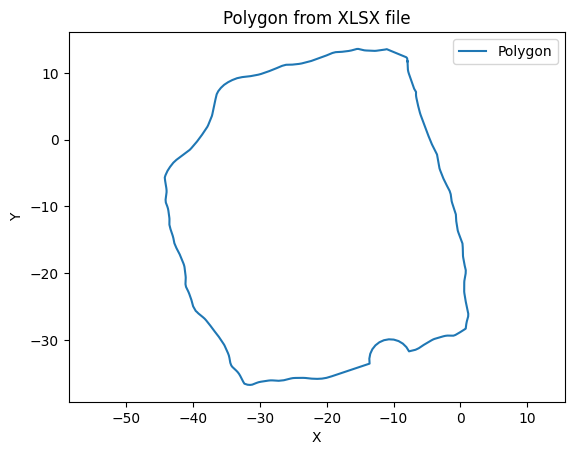

In [17]:
xlsx_file_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'
data = pd.read_excel(xlsx_file_path, sheet_name='UpdatedPath')  # Read the XLSX file
data = data[data['Path_Index'] == 0]  # Filter rows where 'Path_Index' equals 0
x = data["X"].tolist()  # Extract the X and Y coordinates
y = data["Y"].tolist()
x.append(x[0])  # Close the polygon by adding the first point to the end
y.append(y[0])

# Plot the polygon
plt.plot(x, y, label="Polygon")
plt.xlabel("X")  # Set labels and title
plt.ylabel("Y")
plt.title("Polygon from XLSX file")
plt.legend()  # Add legend and show plot
plt.axis('equal')
plt.show()

**10. Create initial Boustrophedon path**<br>
The script to run below uses the inner most polygon ring and creates a Boustrophedon coverage path of line segments.  You need to open the program and confirm the file name being read (xlsx_file_path) as well as the angle of the line segments (angle_degrees).  The innermost poloygon is defined in the sheet 'UpdatedPath'.<br><br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal to create initial Boustrophedon path
</span>
<br>
python3 /home/tractor/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_boustrophedon_coverage_variable_degree4.py

**11. Visualize the Boustrophedon path**<br>
Once the the script above has been run, you can run the script below to visualize the path. The reason this is important is there are likely to be a few line segments that need to be trimmed from the ends because either they are short or disconnected or both.

reading the file:  /home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx


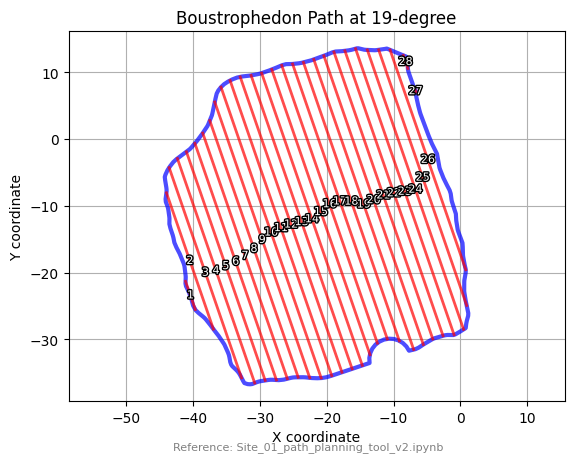

In [18]:
import pandas as pd
from shapely.geometry import Polygon, LineString
from matplotlib import pyplot as plt, patheffects
import os

def read_inner_ring(xlsx_file_path):
    # Read the specified sheet from the Excel file
    df = pd.read_excel(xlsx_file_path, sheet_name='UpdatedPath')
    # Filter the data to include only points with Path_Index = 0
    filtered_df = df[df['Path_Index'] == 0]
    # Create a list of points (tuples) from the filtered data
    polygon_points = list(zip(filtered_df['X'], filtered_df['Y']))
    # Return the polygon created from these points
    return Polygon(polygon_points)

def read_boustrphdn_segments(xlsx_file_path):
    # Read the specified sheet from the Excel file
    df = pd.read_excel(xlsx_file_path, sheet_name='boustrphdn_segmnts')
    # Create a list of LineStrings from the data
    path_lines = []
    for _, row in df.iterrows():
        path_lines.append(LineString([(row['x1'], row['y1']), (row['x2'], row['y2'])]))
    return path_lines

def plot_path(polygon, path_lines, degree):
    fig, ax = plt.subplots()
    x, y = polygon.exterior.xy
    ax.plot(x, y, color='blue', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

    for idx, line in enumerate(path_lines):
        x, y = line.xy
        ax.plot(x, y, color='red', linewidth=2, alpha=0.7, zorder=2)
        # Position the text in the center of the line segment
        text_x = (x[0] + x[1]) / 2
        text_y = (y[0] + y[1]) / 2
        ax.text(text_x, text_y, str(idx + 1), fontsize=8, verticalalignment='center',
                horizontalalignment='center', color='white', path_effects=[
                patheffects.withStroke(linewidth=2, foreground="black")])

    ax.set_title(f'Boustrophedon Path at {degree}-degree')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.grid(True)
    plt.axis('equal')
    # Get the absolute path of the current script
    filepath = 'Site_01_path_planning_tool_v2.ipynb'
    plt.figtext(0.5, 0.01, f'Reference: {filepath}', ha='center', fontsize=8, color='gray')
    plt.show()

# Path to the Excel file
xlsx_file_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'  
print("reading the file: ", xlsx_file_path)
angle_degrees = 19

# Read the polygon data from the Excel file
polygon = read_inner_ring(xlsx_file_path)

# get the boustrophedon segments from the Excel file
path_lines = read_boustrphdn_segments(xlsx_file_path)

# Plot the path
plot_path(polygon, path_lines, angle_degrees)

**12. Trim the initial Boustrophedon path to remove partial segments**<br>
This code defines the input and output file paths, and the number of lines to remove from the beginning and end. It then reads the CSV file line by line, skipping the specified number of lines at the beginning. The remaining lines are stored in a list. Finally, the code iterates through the list and removes the specified number of lines from the end. The trimmed data is then written to a new file with the word "trimmed" added to the original filename.<br><br>
Open the script below and edit the variables:
- beginning_lines_to_remove = 2
- end_lines_to_remove = 2
- xlsx_file_path

<br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal to trim the initial Boustrophedon path
</span>
<br>
python3 /home/tractor/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_boustrophedon_trim_segments.py


**13. Visualize the coverage map for confirmation**<br>
The code below does the following:
* Reads 'input_sheet_name' and stores the data in a list named `data`.
* Plots the starting and ending points of the coverage map line segments.
<br><br>Before running confirm input file 'xlsx_file_path'.

Reading sheet: boustrphdn_trimmed from file: /home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx


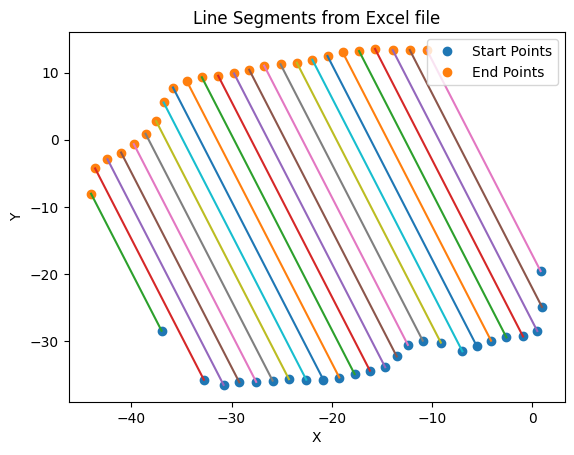

In [19]:
import openpyxl
import matplotlib.pyplot as plt

# Define input file path and sheet name
xlsx_file_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'
input_sheet_name = 'boustrphdn_trimmed'

# Load the workbook and select the input sheet
print(f"Reading sheet: {input_sheet_name} from file: {xlsx_file_path}")
workbook = openpyxl.load_workbook(xlsx_file_path)
input_sheet = workbook[input_sheet_name]

# Read data from the input sheet
data = list(input_sheet.iter_rows(values_only=True))

# Extract line segment coordinates
x1 = [float(row[0]) for row in data]
y1 = [float(row[1]) for row in data]
x2 = [float(row[2]) for row in data]
y2 = [float(row[3]) for row in data]

# Plot line segments
plt.plot(x1, y1, 'o', label='Start Points')
plt.plot(x2, y2, 'o', label='End Points')
for i in range(len(x1)):
    plt.plot([x1[i], x2[i]], [y1[i], y2[i]], label=None)

# Add labels and title
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Line Segments from Excel file")

# Add legend and show plot
plt.legend()
plt.show()




**14. Visualize how the right angles are calculated**<br>
I need to calculate additional points to define the u-turn points.  This step is actually performed two steps below.  The most current cell below is only for informational purposes so you can see the calculation using hard coded data which is hopefully easier to understand.

<img src="images/dubins_image1.png" alt="Dubins Path" width="300px">
You can see for the'start points', which are at the bottom of the image, I need to calculate the point to the left of the start point. For the 'end points', which are at the top of the image, I need to calculate the point to the right of the end point.  These points make a right triangle.

The very first starting point will be ignored as this is the entry point into the continuous path.  Given the assumption is the continuous path is moving from left to right, the new bottom point to the left of the original line segment end point will have an x-axis value less than the the original line segment end point x value.  The new top point to the right of the top point will have an x-axis value greater than the the original line segment top point x value.  

The first small script below is simply a test showing how to use two hard coded points to create a third point and to plot it.  <br><br>

Note there is a change for 'preference' to  'greater' and 'less' to see how the hypotenuse line will shift sides. 


The solution for the hypotenuse with 'greater' preference is: larger on the x-axis
The angle 90.0 is within 0.05 degrees of 90 degrees.


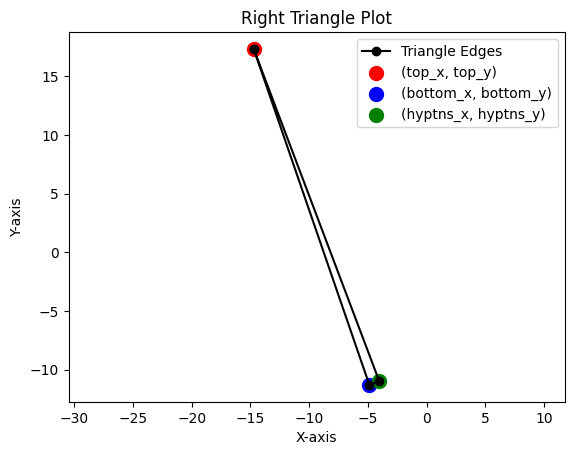

The solution for the hypotenuse with 'less' preference is: smaller on the x-axis
The angle 90.0 is within 0.05 degrees of 90 degrees.


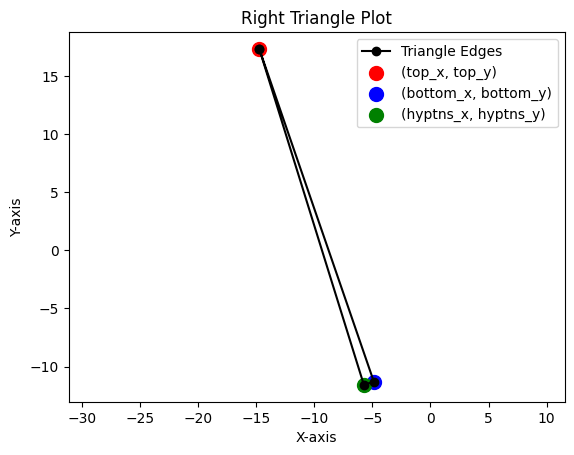

End of script


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_x3_y3_solutions(x1, y1, x2, y2, length=0.9):
    """
    Calculate two possible coordinates of the third point (x3, y3) to form a right triangle
    with the line segment from (x1, y1) to (x3, y3) as the hypotenuse. This function returns
    both solutions, allowing for a choice where x3 can be greater than x2.
    """
    dx = x2 - x1
    dy = y2 - y1

    # Normalize the direction vector (dx, dy)
    norm = np.sqrt(dx**2 + dy**2)
    dx /= norm
    dy /= norm

    # Rotate 90 degrees in both directions and scale by the desired length
    dx1, dy1 = -dy * length, dx * length  # First solution
    dx2, dy2 = dy * length, -dx * length  # Second solution

    # Calculate (x3, y3) for both solutions
    x3_1 = x2 + dx1
    y3_1 = y2 + dy1
    x3_2 = x2 + dx2
    y3_2 = y2 + dy2

    return (x3_1, y3_1), (x3_2, y3_2)

def choose_x3_y3_solution(x2, y2, x3_1, y3_1, x3_2, y3_2, preference='less'):
    """
    Choose the (x3, y3) point based on the preference.

    Parameters:
    - x3_1, y3_1, x2, y2, x3_2, y3_2: Coordinates of x3 and y3 from the first and second solutions, and x2, y2.
    - preference: Can be 'greater' or 'less' to choose which 'side' the hypotenuse should be on in relation to the x-axis.

    Returns:
    - x3, y3: The chosen coordinates of x3 and y3.
    - solution: A string indicating which solution was chosen.
    """
    if preference == 'greater':
        if x3_1 > x2:
            return x3_1, y3_1, "larger on the x-axis"
        else:
            return x3_2, y3_2, "smaller on the x-axis"
    else:  # preference is 'less'
        if x3_1 < x2:
            return x3_1, y3_1, "larger on the x-axis"
        else:
            return x3_2, y3_2, "smaller on the x-axis"

def angle_check(x1, y1, x2, y2, x3, y3, tolerance=0.05):
    """
    Check if the angle at (x2, y2) is close to 90 degrees within a specified tolerance.
    """
    # Vectors (x1,y1)->(x2,y2) and (x3,y3)->(x2,y2)
    vector1 = [x1 - x2, y1 - y2]
    vector2 = [x3 - x2, y3 - y2]

    # Dot product and magnitudes of vectors
    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)

    # Calculate the angle in degrees
    angle = np.arccos(dot_product / (magnitude1 * magnitude2)) * (180 / np.pi)

    # Check if the angle is within the tolerance of 90 degrees
    if np.abs(angle - 90) > tolerance:
        print(f"Error: The angle {round(angle,2)} is not within 0.1 degrees of 90 degrees.")
    else:
        print(f"The angle {round(angle,2)} is within {tolerance} degrees of 90 degrees.")

def plot_triangle(x1, y1, x2, y2, x3, y3):
    plt.figure()

    # Plot the triangle lines first
    plt.plot([x1, x2, x3, x1], [y1, y2, y3, y1], '-o', color='black', label='Triangle Edges')

    # Set different colors for each point with increased size
    plt.scatter(x1, y1, color='red', s=100, label='(top_x, top_y)')
    plt.scatter(x2, y2, color='blue', s=100, label='(bottom_x, bottom_y)')
    plt.scatter(x3, y3, color='green', s=100, label='(hyptns_x, hyptns_y)')

    # Labels, title, and equal aspect ratio
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Right Triangle Plot')
    plt.legend()
    plt.axis('equal')
    plt.show()

# Test points
top_x, top_y = -14.72, 17.32
bottom_x, bottom_y = -4.87, -11.29

# Calculate both possible (x3, y3) points
(hyptns_x_opt_a, hyptns_y_opt_a), (hyptns_x_opt_b, hyptns_y_opt_b) = calculate_x3_y3_solutions(top_x, top_y, bottom_x, bottom_y)

# Run with 'greater' preference
hyptns_x, hyptns_y, solution = choose_x3_y3_solution(bottom_x, bottom_y, hyptns_x_opt_a, hyptns_y_opt_a, hyptns_x_opt_b, hyptns_y_opt_b, preference='greater')
print(f"The solution for the hypotenuse with 'greater' preference is: {solution}")
angle_check(top_x, top_y, bottom_x, bottom_y, hyptns_x, hyptns_y)
plot_triangle(top_x, top_y, bottom_x, bottom_y, hyptns_x, hyptns_y)

# Run with 'less' preference
hyptns_x, hyptns_y, solution = choose_x3_y3_solution(bottom_x, bottom_y, hyptns_x_opt_a, hyptns_y_opt_a, hyptns_x_opt_b, hyptns_y_opt_b, preference='less')
print(f"The solution for the hypotenuse with 'less' preference is: {solution}")
angle_check(top_x, top_y, bottom_x, bottom_y, hyptns_x, hyptns_y)
plot_triangle(top_x, top_y, bottom_x, bottom_y, hyptns_x, hyptns_y)

print("End of script")


**15. Calculate the additional points to make a continuous coverage map**<br>
Use the approach crafted above to calculate the third point of a right triangle and iterate over the .csv file to calculate all the points in the full set of line segments.   
<br>
Open the program and update the key variables:<br>
- xlsx_file_path
- input_sheet_name = 'boustrphdn_trimmed'
- output_sheet_name = 'coverage_path'
<br>

The overview of the program is:<br>
1. Read the data into a DataFrame<br>
2. Assign the values for (x1, y1), (x2, y2) named (bottom_x, bottom_y), (top_x, top_y)<br>
3. Calculate the hypotenuse for the 'bottom' point<br>
4. Calculate the hypotenuse for the 'top' point<br>
5. Store the points in a DataFrame <br>
6. Move to the next line segment until complete<br>
7. Once the loop is complete write the dataframe to a new sheet.<br>
<br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal to make a continuous coverage map
</span>
<br>
python3 /home/tractor/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_create_right_triangles.py


**16. Plot points for visual verification**<br>
Now plot the points from sheet 'coverage_path' for visual verification.  The plot shows the connected path of points. For each row in 'coverage_path' there is  a sequence of 4 points.  The path wraps from Point 1 through Point 4 and and then to Point 1 of the next row.  A green line represents the continuous path.

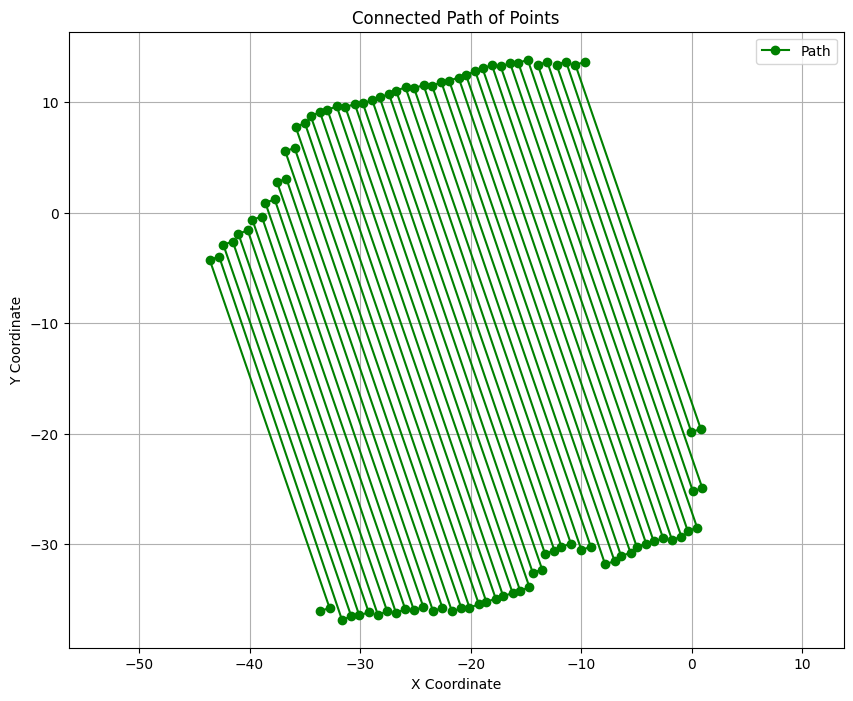

In [28]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

# Define the Excel file path and sheet name
xlsx_file_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'
sheet_name = 'coverage_path'

# Load the provided Excel sheet into a DataFrame without headers
df = pd.read_excel(xlsx_file_path, sheet_name=sheet_name, header=None)

# Manually assign the column names
df.columns = ['Point_1_x', 'Point_1_y', 'Point_2_x', 'Point_2_y', 'Point_3_x', 'Point_3_y', 'Point_4_x', 'Point_4_y']

# Initialize lists to hold the x and y coordinates in the order of plotting
x_coords = []
y_coords = []

# Loop through the DataFrame and add the coordinates in the required order
for index, row in df.iterrows():
    x_coords.extend([row['Point_1_x'], row['Point_2_x'], row['Point_3_x'], row['Point_4_x']])
    y_coords.extend([row['Point_1_y'], row['Point_2_y'], row['Point_3_y'], row['Point_4_y']])

# Now plot the points and the connecting green line
plt.figure(figsize=(10, 8))

# Plot the red and blue dots for points 1 and 2
# plt.scatter(df['Point_1_x'], df['Point_1_y'], color='red', label='Point 1')
# plt.scatter(df['Point_2_x'], df['Point_2_y'], color='blue', label='Point 2')

# Connect the points with a green line
plt.plot(x_coords, y_coords, 'go-', label='Path')

# Set the x and y axis limits to be equal
plt.axis('equal')

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Connected Path of Points')
plt.legend()
plt.grid(True)
plt.show()


**17. Reformat the data to prepare for angle calculations**<br>
Iterate through the x, y data (i.e. the path) and calculate the angle each segment is travelling to be able to use that as input into the path generator routine.  To do that I first need to reformat the 1 row, 4 point x, y data into a series of rows with just one x, y data point for each row. The results will be saved to a new sheet 'coverage_path_refrmttd' in the same Excel file.

<br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal to reformat the data
</span>
<br>
python3 /home/tractor/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_coverage_path_reformat.py

**18. Calculate the angle between points, add  lookahead and speed**<br>
The robot needs a plan that contains and x, y point plus angle, speed and lookahead distance.  This script calculates the andgle and adds speed and lookahead.
<br><br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal to calculate the angle between points, add  lookahead and speed
</span>
<br>
python3 /home/tractor/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_add_angle_to_xy.py

**19. Generate path using Dubins shortest path**<br>
Read in a series of waypoints from the file waypoint.txt and expand them based on the step size and angle using the Dubins shortest path library.  The practical use of this is to have a Dubins path (i.e. straight segments followed by a u-turn that is shaped like a key hole).

For an explanation for the input file can be found in the document 'Path Planning - Creating a waypoint plan using path_generator.odt' which can be found at https://github.com/jones2126/ros1_lawn_tractor_ws


references:
- credit to Matt Droter for an initial outline script
- https://pypi.org/project/dubins/

<br><br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal to generate path using Dubins shortest path
</span>
<br>
python3 /home/tractor/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_create_dubins.py

**20. Visually check the stripes**<br>
The script below runs for ~20 seconds on the "tractor" laptop (i.e. my HP G-645) with a path of 8K points.  For future consideration the script 'path_test_plot_before_running_simulation.py' seems to run faster.

Run the script outside of Jupyter if you need to zoom in on particular points.

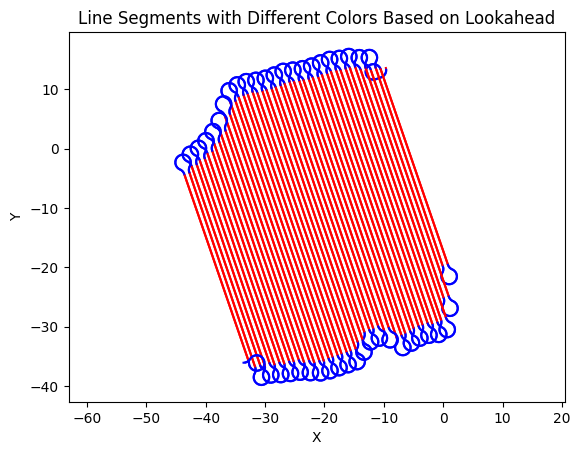

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to read data from an Excel sheet
def read_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=0)
    df.columns = ['x', 'y', 'theta', 'lookahead', 'speed']
    points = df[['x', 'y', 'lookahead']].values.tolist()
    return points

# Function to plot the data
def plot_data(points):
    for i in range(len(points) - 1):
        x1, y1, lookahead1 = points[i]
        x2, y2, lookahead2 = points[i + 1]

        # Choose color based on lookahead value
        color = 'red' if lookahead1 == 2.5 else 'blue'

        # Plotting the line segment
        plt.plot([x1, x2], [y1, y2], color=color)

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Line Segments with Different Colors Based on Lookahead')
    plt.axis("equal")
    # Show the plot
    plt.show()

# Main
file_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'
sheet_name = 'path_dubins_reversed'
data_points = read_data(file_path, sheet_name)
plot_data(data_points)

**21. Check where the path starts**<br>
In order to confirm the first records I have an additional plot that inspects just the beginning records so I can clean up the start and end points and confirm the sequence (i.e. are the points in the top right or bottom left the first points?).
<br>
- Double check **'sheet_name'** below.  Use **'path_dubins'** or **'path_dubins_reversed'** depending on whether you have reversed the path or not.

First five records:
[-9.654275820333295, 13.56750056826142, 2.5]
[-9.605460241938712, 13.27217305623974, 1.0]
[-9.625487935975361, 12.97350904514619, 1.0]
[-9.713297063731579, 12.68734325904727, 1.0]
[-9.864232115146248, 12.42884778460842, 1.0]


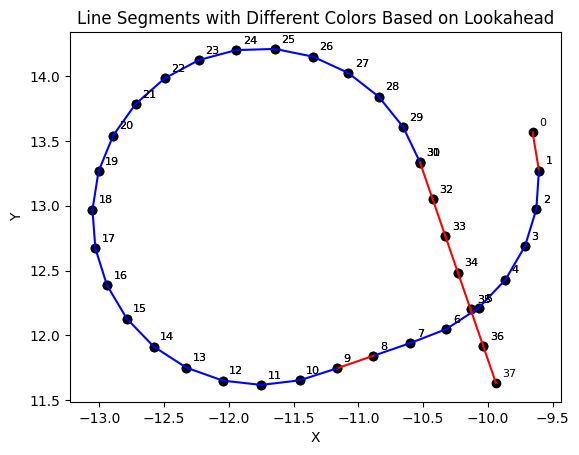

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to read data from an Excel sheet
def read_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=0)
    
    # Explicitly convert columns to the correct data types
    df['x'] = pd.to_numeric(df['x'], errors='coerce')
    df['y'] = pd.to_numeric(df['y'], errors='coerce')
    df['lookahead'] = pd.to_numeric(df['lookahead'], errors='coerce')
    
    # Drop rows with NaN values in important columns
    df = df.dropna(subset=['x', 'y', 'lookahead'])
    
    points = df[['x', 'y', 'lookahead']].values.tolist()
    return points

# Function to plot the data
def plot_data(points, num_records):
    # Print the first five records
    print("First five records:")
    for record in points[:5]:
        print(record)

    # Plot only the first num_records points
    points = points[:num_records]
    for i in range(len(points) - 1):
        x1, y1, lookahead1 = points[i]
        x2, y2, lookahead2 = points[i + 1]

        # Choose color based on lookahead value
        color = 'red' if lookahead1 == 2.5 else 'blue'

        # Plotting the line segment
        plt.plot([x1, x2], [y1, y2], color=color)

        # Plotting the points
        plt.scatter([x1, x2], [y1, y2], color='black')

        # Annotating the x, y points with index numbers
        index_offset = 0.05
        plt.text(x1 + index_offset, y1 + index_offset, str(i), fontsize=8)
        plt.text(x2 + index_offset, y2 + index_offset, str(i+1), fontsize=8)

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Line Segments with Different Colors Based on Lookahead')

    # Make X and Y axes consistent
    plt.axis("equal")
    plt.gca().set_aspect('equal', adjustable='box')
    
    # Show the plot
    plt.show()

# Main
file_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'
sheet_name = 'path_dubins_reversed'
num_records = 38  # Variable to adjust the number of records to plot
data_points = read_data(file_path, sheet_name)
plot_data(data_points, num_records)


**22. Reverse the sequence if needed**<br>
At approximately step 10 I established the stripes and their corresponding x, y points would move from left to right.  I now need to switch to right to left since the ring paths start and end in the upper right corner. This script is a quick re-sort.  Consider in the future to go back to step 10 and beyond and add some type of variable to accomodate different starting points.
<br><br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal to reverse the sequence of the path
</span>
<br>
python3 /home/tractor/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_reverse_dubins.py

**23. Edit the start**<br><br>I have revesed the sequence, now I need to edit the transition from the rign path to the stripes.  I also need to edit the end so the end of the path is not a u-turn.

The last row in sheet 'Outer_ring_path' is: -4.92 11.95 4.82 2.5 0.75
Also get 2nd to the last row


Pt 30 on the stripe path (path_dubins_reversed) is: -10.52 13.33 1.90 1 0.75
And get pt 31

The path will be:
1. Outer_ring_path - 2nd to the last row
2. Outer_ring_path - last row
3. path_dubins_reversed - Pt 30 - selected after visually determining first part of straight line segment
4. path_dubins_reversed - Pt 31 (the next point after the point above)

Copy these to a .txt file and feed them into the generator.  You will need to review the angle.

Open  
/home/tractor/ros1_lawn_tractor_ws/project_notes/code_for_testing/path_planner_stable/path_planning_waypoint_generator_dynamic_lookahead.py
This is the program that sets a different lookahead distance based on the curvature of the line segment (i.e. uses 1.0 for curves and 2.5 for straights)

To get a reminder about the input format open,
"/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/Site_01_boustrophen_generator_input.txt"


**xx. Combining the outer rings and stripes**<br>
I need to confirm I have an outer ring path with speed and lookahead set.  The sheet 'UpdatedPath' has the x, y points, but not the lookahead and speed.<br>
Print the outer ring path<br>
Think through how to plan the path from the last point to the first point of the stripe path<br>
I think I need to trim the first Dubins keyhole from the stripe path to simplify moving from the outer ring to the stripe.

Create a sheet 'combined path'; Copy the sheet 'outer_rings_path'; Add the sheet 'path_dubins_reversed'.  Note the number of rows in 'outer_rings_path'.

**xx. Visually check the outer path and the stripes together**<br>
This is simply a visualization step to review the paths.  The input files have the x, y, theta, lookahead and speed as columns and are therefore ready to be input files to pure_pursuit.cpp

Open the script and update hardcoding for filepath names**<br>

The 'stripe' path is output from <u>Step 11 - Generate path using Dubins shortest path</u> above.  In the Jupyter cell there is a statement 'output_file_waypoints = working_directory + "test_generator_output.txt"' which appends text to the working directory.  The full name is printed when the cell finishes execution.  That name should be used for the 'blue path' filename. 

The ring path is output from script 'path_ll2xy_2inner_rings_v4.py'.  There is a variable 'finished_xy_file' that defines this file.  So whatever name is used there should be used for the 'green path' filename.

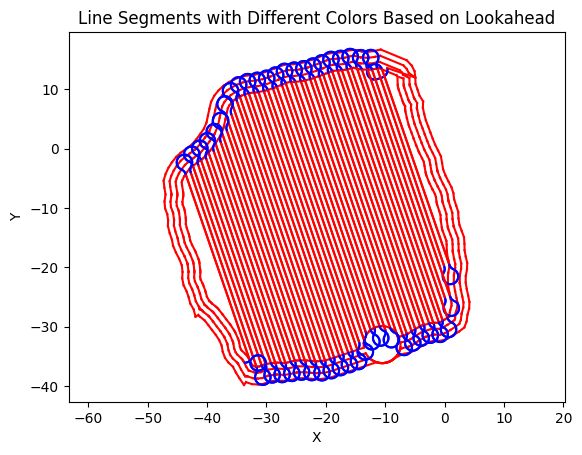

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to read data from an Excel sheet
def read_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
    df.columns = ['x', 'y', 'theta', 'lookahead', 'speed']
    points = df[['x', 'y', 'lookahead']].values.tolist()
    return points

# Function to plot the data
def plot_data(points):
    for i in range(len(points) - 1):
        x1, y1, lookahead1 = points[i]
        x2, y2, lookahead2 = points[i + 1]

        # Choose color based on lookahead value
        color = 'red' if lookahead1 == 2.5 else 'blue'

        # Plotting the line segment
        plt.plot([x1, x2], [y1, y2], color=color)

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Line Segments with Different Colors Based on Lookahead')
    plt.axis("equal")
    # Show the plot
    plt.show()

# Main
file_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'
sheet_name = 'combined_path'
data_points = read_data(file_path, sheet_name)
plot_data(data_points)

In [21]:
import subprocess

# Full path to the subl command and the file you want to open
subl_path = "/snap/bin/subl"
file_path = "/home/tractor/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_test_plot_before_running_simulation.py"

# Running the command
subprocess.run([subl_path, file_path])

CompletedProcess(args=['/snap/bin/subl', '/home/tractor/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_test_plot_before_running_simulation.py'], returncode=0)

**25. Visualize combined paths**<br>
In a seperate terminal window run <br> $ python3 /home/tractor/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_test_plot_before_running_simulation.py
<br><br>
Currently it will generate the following visual: <br><br>
<img src="images/combine_path1.png" alt="Dubins Path" width="300px">
<br>
Consider the following changes:
1. Four of the stripes need to be shortened to avoid the obstacle circle
2. Where the blue and green lines overlap is 'waste' in that it would lead to going over the same path twice.  I'm thinking to only run the two most outer rings and add more stripes to eliminate the white space after testing.
3. Stripes can be added to the beginning and end to reduce the white space<br> The file boustrophedon_line_segments is created in Step 3.  You **cannot** simply go back to <u>Step 4 - Trim the initial Boustrophedon path to remove partial segments</u> and adjust the lines to be trimmed. Step 3 uses the 5th ring as input to create the line segments and for some reason it does not believe there is a lot of white space that is unobstructed.  

**Changing the length of the line segments**<br>
I previously wrote this script, /home/tractor/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_test_adjust_line_segment_length.py

It takes as input:
1. The output file name: uturn_points_csv = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/path_uturn_adjusted.csv'
2. The input file name: ods_file_path = '~/project_notes/paths/Collins_Dr_62/Site_01_boustrophedon_w_formulas_v1.ods'
3. length_to_shorten = -3.0  # using a negative number will extend the line (i.e. make it longer)
4. starting_row_of_data = 9


The program above plots the provided point and the new point

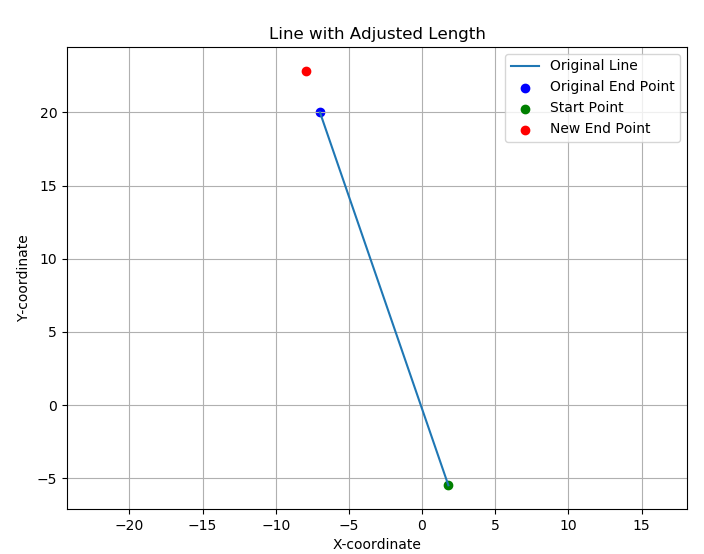

I need to know which line segments to shorten or extend.  One of the programs plots that.  I should be able to calculate this either by using the straight line segments or the u-turns or both.  Start with the straight line segments.  Where is the current line segment intersection performed?

This is the 'shortening' program: path_test_adjust_line_segment_length.py
The program for determining intersections is: path_ll2xy_2inner_rings_v4.py; What are the inputs and outputs?
